In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("../../data/AAPL_GOOG_prices.csv", index_col=0, parse_dates=True)
df.head()

,AAPL,GOOG
Date,,
2004-08-19,0.465474,2.499133
2004-08-20,0.466838,2.697639
2004-08-23,0.471082,2.724787
2004-08-24,0.484269,2.611960
2004-08-25,0.500942,2.640104


To begin with, it is nice to work get a grasp of what is going on with the time series at hand. We can use a line chart for that.

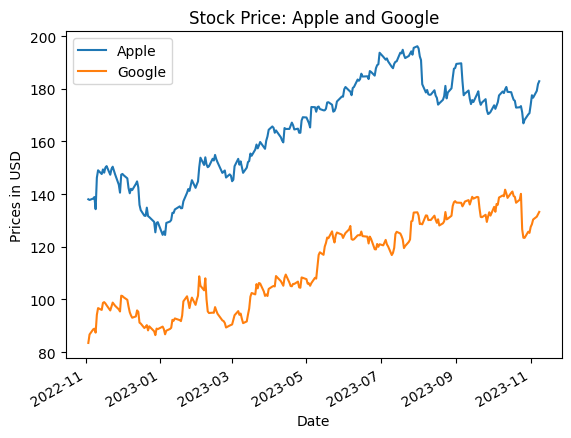

In [68]:
df = df.tail(255) # Past year, there are ~255 bussiness days in a year.

# Add labels and graphs
df.plot()
plt.ylabel("Prices in USD")
plt.title("Stock Price: Apple and Google")
plt.legend(["Apple", "Google"])

To calculate returns, you can use the following formula:
$\displaystyle R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$.

Lets look at the distribution of returns in from the data. We can use a histogram for that.

<Axes: >

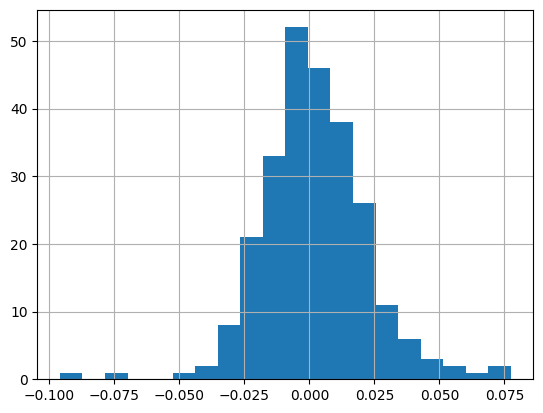

In [69]:
ret = df.pct_change()
ret["GOOG"].hist(bins=20)

How are, the two stocks related? We can use a scatter plot to gain an unsderstanding of that. Someone wanted a line as well so we added that

In [71]:
corr = ret.corr().values[0,1] # Slope of the line! 

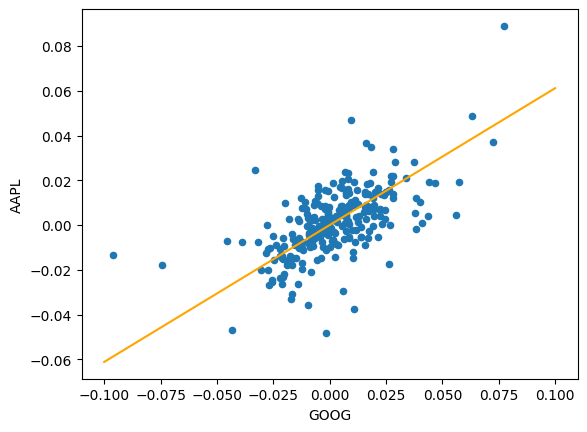

In [72]:
x = [-.1,.1]
y = [-.1*corr, 0.1*corr]
ret.plot.scatter(x="GOOG", y="AAPL")
plt.plot(x,y, 'orange')

Box plot to compare the moments of the different distriubtions

Text(0, 0.5, 'Price in USD')

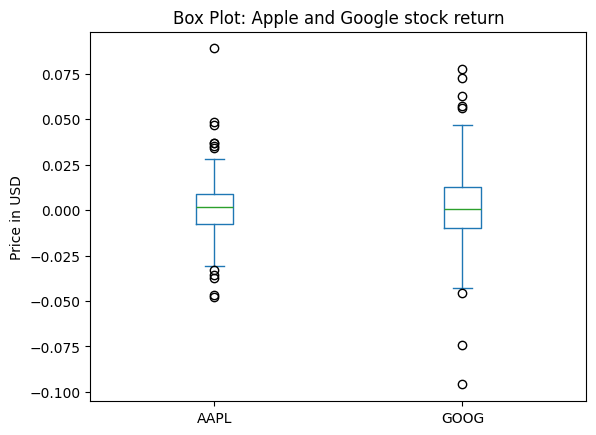

In [52]:
ret.plot.box()
plt.title("Box Plot: Apple and Google stock return")
plt.ylabel("Price in USD")

Now, lets look a trading strategy, allocating $w_1$ on Apple and $w_2$ on Google. They should add up to 1.

<Axes: xlabel='Date'>

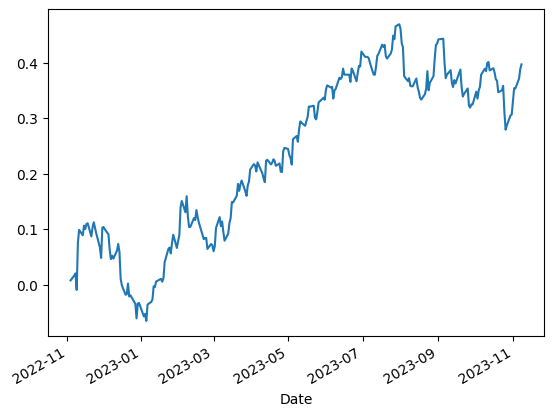

In [74]:
w = [0.75, 0.25]

portfolio_ret = (ret * w).apply(lambda x: sum(x), axis=1)
((portfolio_ret + 1).cumprod() - 1).plot()

Compare moments of our strategy to Apple or Google only strategy.

<Axes: >

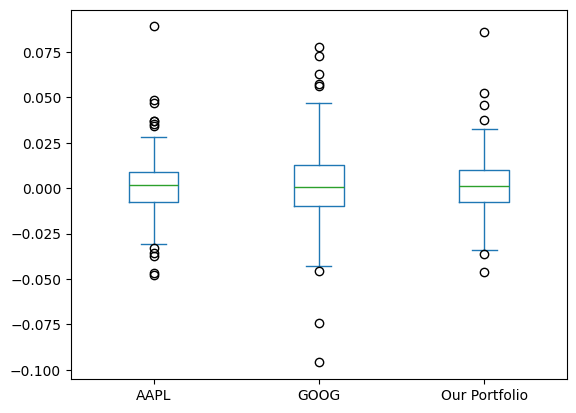

In [76]:
ret["Our Portfolio"] = portfolio_ret
ret.plot.box()